In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import numpy as np
from datetime import datetime
import time
df_w = pd.read_csv("wireshark.csv")
smartsniff_header = ["index","protocol","Local address","Remote address","Local port","Remote port","Local host","Remote host","Service name","Packets","Data size","Total size","Data speed","Capture time","Last packet time","Duration","Local MAC address","Remote MAC address","Local IP country","Remote IP country"]
df_s = pd.read_csv("smartsniff_data.csv",names=smartsniff_header)
df_s = df_s.drop(["Local MAC address","Remote MAC address","Local IP country","Remote IP country","index","Local host","Remote host"],axis=1)
# dropping the rows having NaN values
df_s = df_s.dropna(subset=["Data speed"])
 
# To reset the indices
df_s = df_s.reset_index(drop = True)
df_s

,protocol,Local address,Remote address,Local port,Remote port,Service name,Packets,Data size,Total size,Data speed,Capture time,Last packet time,Duration
0,UDP,172.16.243.6,224.0.0.251,5353.0,5353.0,NaN,60,720 Bytes,"2,440 Bytes",0.0 KB/Sec,10/14/2022 11:29:43 AM:996,10/14/2022 11:31:02 AM:842,00:01:18.845
1,UDP,172.16.242.30,224.0.0.251,5353.0,5353.0,NaN,28,"11,121 Bytes","12,344 Bytes",0.1 KB/Sec,10/14/2022 11:29:44 AM:001,10/14/2022 11:31:04 AM:072,00:01:20.070
2,UDP,172.16.243.125,224.0.0.251,5353.0,5353.0,NaN,18,"7,226 Bytes","8,162 Bytes",0.1 KB/Sec,10/14/2022 11:29:44 AM:010,10/14/2022 11:31:03 AM:972,00:01:19.961
3,UDP,172.16.241.207,239.255.255.250,49294.0,1900.0,ssdp,18,"2,466 Bytes","3,135 Bytes",0.0 KB/Sec,10/14/2022 11:29:44 AM:907,10/14/2022 11:30:40 AM:824,00:00:55.916
4,UDP,172.16.241.207,172.16.240.151,49294.0,1900.0,ssdp,8,"3,888 Bytes","4,626 Bytes",0.1 KB/Sec,10/14/2022 11:29:44 AM:950,10/14/2022 11:30:40 AM:834,00:00:55.883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,UDP,192.168.43.124,192.168.43.1,49997.0,53.0,domain,2,205 Bytes,343 Bytes,4.3 KB/Sec,10/14/2022 11:45:39 AM:488,10/14/2022 11:45:39 AM:538,00:00:00.049
424,UDP,192.168.43.124,192.168.43.1,53970.0,53.0,domain,2,217 Bytes,355 Bytes,2.3 KB/Sec,10/14/2022 11:45:39 AM:490,10/14/2022 11:45:39 AM:574,00:00:00.084
425,UDP,192.168.43.124,192.168.43.1,54425.0,53.0,domain,2,159 Bytes,289 Bytes,0.7 KB/Sec,10/14/2022 11:45:39 AM:743,10/14/2022 11:45:39 AM:971,00:00:00.227
426,UDP,192.168.43.124,192.168.43.1,63815.0,53.0,domain,2,147 Bytes,277 Bytes,3.1 KB/Sec,10/14/2022 11:45:39 AM:743,10/14/2022 11:45:39 AM:783,00:00:00.040


# Smartsniff

# Throughput

In [2]:
# df_s["Throughput"] = df_s[""]
df["Duration in seconds"] = ""
type(df["Total size"][0])
for i in range(0,len(df["Total size"])):
    df["Total size"][i] = df["Total size"][i].translate(str.maketrans('', '', string.punctuation))
    df["Total size"][i] = int(df["Total size"][i].split(' ')[0])
    
    df["Data size"][i] = df["Data size"][i].translate(str.maketrans('', '', string.punctuation))
    df["Data size"][i] = int(df["Data size"][i].split(' ')[0])
    
#     df_s["Data speed"][i] = df_s["Data speed"][i].split(' ')[0]
#     print(i)
    df["Data speed"][i] = float(df["Data speed"][i].split(' ')[0])
#     df_s["Data speed"][i] = float(df_s["Data speed"][i])

    df["Duration"][i] = datetime.strptime(df["Duration"][i].split('.')[0], '%H:%M:%S')
    df["Duration in seconds"][i] = df["Duration"][i] - datetime.datetime(19)
    
    df["Packets"][i] = df["Packets"][i].translate(str.maketrans('', '', string.punctuation))
    df["Packets"][i] = int(df["Packets"][i].split(' ')[0])
    df["Packets"][i] = int(df["Packets"][i])
    

C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Gowri\Anaconda3\lib\site-packages\ipyk

In [10]:
df_s["Throughput"] = df_s["Total size"]/(1000*df_s["Packets"])

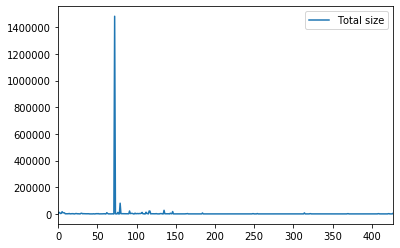

In [11]:
df_s["Total size"]
df_s.plot(y="Total size")

In [ ]:
len(df_s["Total size"])

In [109]:
print((datetime.strptime(df_s["Duration"][0].split('.')[0], '%H:%M:%S')))

1900-01-01 00:01:18


In [3]:
df_s

,protocol,Local address,Remote address,Local port,Remote port,Service name,Packets,Data size,Total size,Data speed,Capture time,Last packet time,Duration
0,UDP,172.16.243.6,224.0.0.251,5353.0,5353.0,NaN,60,720,2440,0,10/14/2022 11:29:43 AM:996,10/14/2022 11:31:02 AM:842,1900-01-01 00:01:18
1,UDP,172.16.242.30,224.0.0.251,5353.0,5353.0,NaN,28,11121,12344,0.1,10/14/2022 11:29:44 AM:001,10/14/2022 11:31:04 AM:072,1900-01-01 00:01:20
2,UDP,172.16.243.125,224.0.0.251,5353.0,5353.0,NaN,18,7226,8162,0.1,10/14/2022 11:29:44 AM:010,10/14/2022 11:31:03 AM:972,1900-01-01 00:01:19
3,UDP,172.16.241.207,239.255.255.250,49294.0,1900.0,ssdp,18,2466,3135,0,10/14/2022 11:29:44 AM:907,10/14/2022 11:30:40 AM:824,1900-01-01 00:00:55
4,UDP,172.16.241.207,172.16.240.151,49294.0,1900.0,ssdp,8,3888,4626,0.1,10/14/2022 11:29:44 AM:950,10/14/2022 11:30:40 AM:834,1900-01-01 00:00:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,UDP,192.168.43.124,192.168.43.1,49997.0,53.0,domain,2,205,343,4.3,10/14/2022 11:45:39 AM:488,10/14/2022 11:45:39 AM:538,1900-01-01 00:00:00
424,UDP,192.168.43.124,192.168.43.1,53970.0,53.0,domain,2,217,355,2.3,10/14/2022 11:45:39 AM:490,10/14/2022 11:45:39 AM:574,1900-01-01 00:00:00
425,UDP,192.168.43.124,192.168.43.1,54425.0,53.0,domain,2,159,289,0.7,10/14/2022 11:45:39 AM:743,10/14/2022 11:45:39 AM:971,1900-01-01 00:00:00
426,UDP,192.168.43.124,192.168.43.1,63815.0,53.0,domain,2,147,277,3.1,10/14/2022 11:45:39 AM:743,10/14/2022 11:45:39 AM:783,1900-01-01 00:00:00


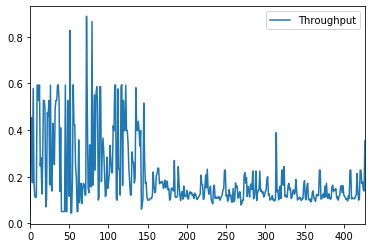

In [17]:
df_s.plot(y="Throughput")

In [23]:
df_blr = pd.read_csv("blrdata.ssp")
df_blr

ParserError: Error tokenizing data. C error: Expected 1 fields in line 8, saw 2
